# Кластеризація Частина 2: Ієрархічні методи

## Вступ до ієрархічної кластеризації

### Що таке ієрархічна кластеризація?

**Ієрархічна кластеризація** - це метод навчання без вчителя, який створює **деревоподібну структуру**, що представляє зв'язки між точками даних. На відміну від методів розбиття, таких як k-means, ієрархічна кластеризація не вимагає попереднього визначення кількості кластерів.

### Ключові характеристики

1. **Деревоподібна структура**: Створює ієрархію кластерів, організовану як дерево
2. **Немає попередньо визначеного k**: Кількість кластерів визначається розрізанням дендрограми
3. **Детермінована**: Завжди дає той самий результат для тих самих даних
4. **Два підходи**: Агломеративна (знизу вгору) та Дивізівна (зверху вниз)

## Кластеризація на основі дерева та дендрограми

### Що таке дендрограма?

**Дендрограма** - це деревоподібна діаграма, яка показує ієрархічні зв'язки між точками даних. Це візуальне представлення процесу кластеризації, де:

- **Листя** представляють окремі точки даних
- **Гілки** показують, як кластери об'єднуються або розділяються
- **Висота** гілок вказує на відстань між кластерами
- **Корінь** представляє всі точки даних в одному кластері

![Dendogram](../images/7.0-hierarchical-clustering-dendogram.png)

[Джерело зображення](https://spotintelligence.com/2023/09/12/hierarchical-clustering-comprehensive-practical-how-to-guide-in-python/)

## Агломеративна ієрархічна кластеризація (знизу вгору)

### Як працює агломеративна кластеризація

**Агломеративна кластеризація** починає з кожної точки даних як окремого кластера та ітеративно об'єднує найбільш подібні кластери до тих пір, поки всі точки не будуть в одному кластері.

### Кроки алгоритму

1. **Ініціалізація**: Кожна точка даних є своїм власним кластером
2. **Обчислити відстані**: Обчислити відстані між усіма парами кластерів
3. **Об'єднати**: Знайти два найближчі кластери та об'єднати їх
4. **Оновити відстані**: Перерахувати відстані між новим кластером та рештою кластерів
5. **Повторити**: Продовжувати до тих пір, поки не залишиться лише один кластер

### Математичне представлення

На кожному кроці нам потрібно обчислити відстань між кластерами. Нехай $C_i$ та $C_j$ - два кластери, тоді:

$$d(C_i, C_j) = \text{linkage\_function}(C_i, C_j)$$

Функція зв'язку визначає, як ми вимірюємо відстань між кластерами, що містять кілька точок.

## Дивізівна ієрархічна кластеризація (зверху вниз)

### Як працює дивізівна кластеризація

**Дивізівна кластеризація** використовує протилежний підхід - вона починає з усіх точок даних в одному кластері та ітеративно розділяє кластери на менші.

### Кроки алгоритму

1. **Ініціалізація**: Всі точки даних в одному кластері
2. **Знайти розділення**: Визначити найкращий спосіб розділити найбільший кластер
3. **Розділити**: Розділити кластер на два підкластери
4. **Повторити**: Продовжувати розділення до тих пір, поки кожна точка не стане своїм власним кластером

## Критерії зв'язку

### Що таке критерії зв'язку?

**Критерії зв'язку** визначають, як ми вимірюємо відстань між двома кластерами, які містять кілька точок даних. Вибір критерію зв'язку значно впливає на результуючу структуру кластерів.

### Одиночний зв'язок (мінімальний зв'язок, single linkage, minimum linkage)

**Одиночний зв'язок** використовує **мінімальну відстань** між будь-якими двома точками в двох кластерах.

$$d_{single}(C_i, C_j) = \min_{x \in C_i, y \in C_j} d(x, y)$$

**Характеристики:**
- Створює **ланцюжкові кластери** (ефект ланцюжка)
- Чутливий до викидів
- Може створювати витягнуті кластери
- Добре для виявлення несферичних кластерів

### Повний зв'язок (максимальний зв'язок, complete linkage, maximum linkage)

**Повний зв'язок** використовує **максимальну відстань** між будь-якими двома точками в двох кластерах.

$$d_{complete}(C_i, C_j) = \max_{x \in C_i, y \in C_j} d(x, y)$$

**Характеристики:**
- Створює **компактні, сферичні кластери**
- Менш чутливий до викидів
- Схильний створювати кластери подібних розмірів
- Добре для виявлення добре розділених кластерів

### Середній зв'язок (average linkage)

**Середній зв'язок** використовує **середню відстань** між усіма парами точок у двох кластерах.

$$d_{average}(C_i, C_j) = \frac{1}{|C_i| \cdot |C_j|} \sum_{x \in C_i} \sum_{y \in C_j} d(x, y)$$

**Характеристики:**
- **Збалансований підхід** між одиночним та повним зв'язком
- Менш чутливий до викидів, ніж одиночний зв'язок
- Створює кластери помірної компактності
- Найчастіше використовується на практиці

### Центроїдний зв'язок (centroid linkage)

**Центроїдний зв'язок** використовує **відстань між центроїдами** двох кластерів.

$$d_{centroid}(C_i, C_j) = d(\mu_{C_i}, \mu_{C_j})$$

де $\mu_{C_i}$ та $\mu_{C_j}$ - центроїди кластерів $C_i$ та $C_j$ відповідно.

**Характеристики:**
- **Геометричний підхід** на основі центрів кластерів
- Може створювати **інверсії** в дендрограмі (немонотонні)
- Чутливий до форм та розмірів кластерів
- Добре для сферичних кластерів подібних розмірів
- Менш часто використовується через проблеми з інверсіями

### Зв'язок Варда (Ward linkage)

**Зв'язок Варда** мінімізує **збільшення суми квадратів всередині кластера** при об'єднанні кластерів.

$$d_{ward}(C_i, C_j) = \sqrt{\frac{|C_i| \cdot |C_j|}{|C_i| + |C_j|}} \cdot d(\mu_{C_i}, \mu_{C_j})$$

**Характеристики:**
- **Підхід, що мінімізує дисперсію**
- Створює **компактні, сферичні кластери**
- Дуже популярний для багатьох застосувань
- Схильний створювати кластери подібних розмірів
- Добре працює з евклідовою відстанню
- **Монотонний** (немає інверсій у дендрограмі)

![Dendogram](../images/7.1-Hierarchical-Clustering-Linkages.png)

[Джерело зображення](https://dataaspirant.com/hierarchical-clustering-algorithm/)

## Ієрархічна vs K-Means: Плюси та мінуси

### Ієрархічна кластеризація

#### Переваги
- **Немає потреби визначати k**: Кількість кластерів визначається після побудови дендрограми
- **Візуалізація**: Дендрограма надає візуальне представлення структури кластерів
- **Гнучкість**: Можна отримати різну кількість кластерів, розрізаючи дендрограму на різних рівнях
- **Детермінованість**: Завжди дає той самий результат для тих самих даних
- **Не вимагає початкових центроїдів**: Немає проблеми з ініціалізацією

#### Недоліки
- **Обчислювальна складність**: O(n³) для агломеративної, O(2^n) для дивізівної
- **Пам'ять**: Потрібно зберігати матрицю відстаней O(n²)
- **Не масштабована**: Не підходить для дуже великих наборів даних (>10,000 точок)
- **Чутливість до викидів**: Деякі критерії зв'язку чутливі до викидів
- **Не можна скасувати**: Після об'єднання кластерів, їх не можна розділити

### K-Means кластеризація

#### Переваги
- **Швидка**: O(n·k·i), де i - кількість ітерацій
- **Масштабована**: Працює з великими наборами даних
- **Ефективна пам'ять**: O(n) пам'яті
- **Проста**: Легко зрозуміти та реалізувати

#### Недоліки
- **Потрібно визначати k**: Кількість кластерів повинна бути відома заздалегідь
- **Чутливість до ініціалізації**: Різні початкові центроїди дають різні результати
- **Припускає сферичні кластери**: Може не працювати добре з несферичними формами
- **Локальні оптимуми**: Може застрягнути в субоптимальних рішеннях

## Приклад

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")
print("Ready to explore hierarchical clustering! 🚀")

📚 Libraries imported successfully!
Ready to explore hierarchical clustering! 🚀


In [ ]:
# Create a small, simple dataset for demonstration
np.random.seed(42)

# Generate 15 data points in 2D with 3 clusters
X, true_labels = make_blobs(n_samples=15, centers=3, n_features=2, 
                           random_state=42, cluster_std=0.8)

# Create a DataFrame for easier handling
df = pd.DataFrame(X, columns=['X1', 'X2'])
df['True_Cluster'] = true_labels

print("Dataset created successfully!")
print(f"Shape: {X.shape}")
print(f"Number of true clusters: {len(np.unique(true_labels))}")
print("\nFirst few data points:")
print(df.head())

🎯 Dataset created successfully!
Shape: (15, 2)
Number of true clusters: 3

First few data points:
         X1        X2  True_Cluster
0 -1.245827  9.628234             0
1 -2.879932  8.641702             0
2  5.812398  1.792549             1
3 -7.800422 -6.579551             2
4  4.693901  0.833371             1


/var/folders/jq/209h6ksd2wbc03t0j0mxk1bh0000gn/T/ipykernel_51242/1051471954.py:18: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
/Users/roman/.pyenv/versions/3.10.10/envs/data-mining-course/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


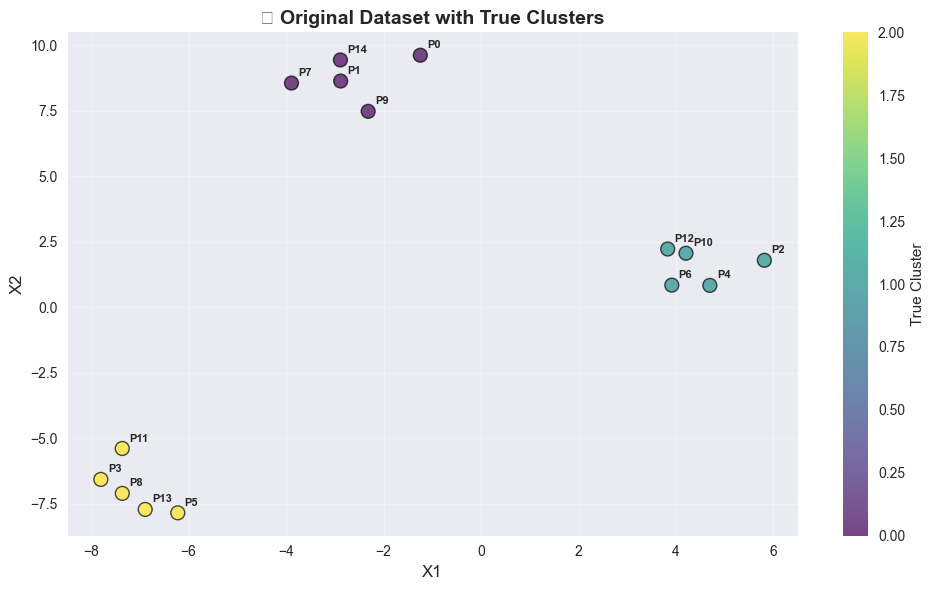

📊 Data visualization complete!
Each point is labeled P0-P14 for easy reference in the dendrogram


In [ ]:
# Visualize the original data
plt.figure(figsize=(10, 6))

# Plot the data points with true cluster colors
scatter = plt.scatter(X[:, 0], X[:, 1], c=true_labels, cmap='viridis', 
                     s=100, alpha=0.7, edgecolors='black', linewidth=1)

# Add point labels
for i, (x, y) in enumerate(X):
    plt.annotate(f'P{i}', (x, y), xytext=(5, 5), textcoords='offset points',
                fontsize=8, fontweight='bold')

plt.title('Original Dataset with True Clusters', fontsize=14, fontweight='bold')
plt.xlabel('X1', fontsize=12)
plt.ylabel('X2', fontsize=12)
plt.colorbar(scatter, label='True Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Data visualization complete!")
print("Each point is labeled P0-P14 for easy reference in the dendrogram")

/var/folders/jq/209h6ksd2wbc03t0j0mxk1bh0000gn/T/ipykernel_51242/736253002.py:21: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  plt.tight_layout()
/Users/roman/.pyenv/versions/3.10.10/envs/data-mining-course/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


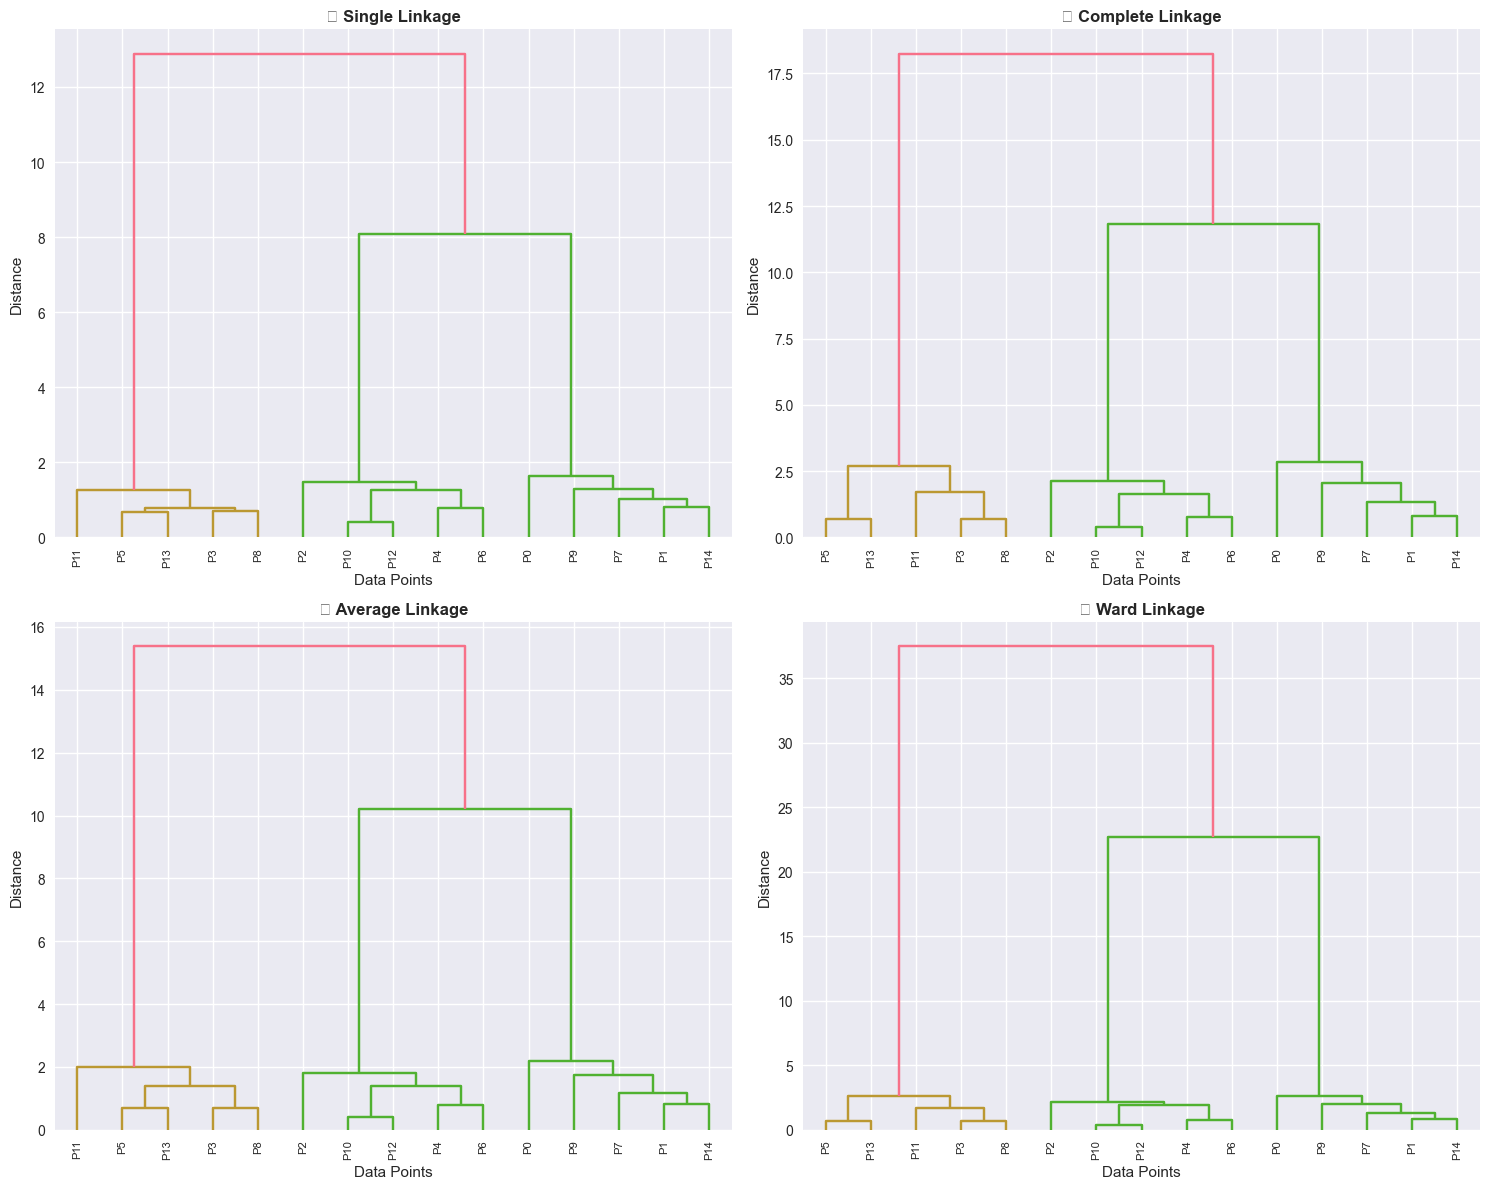

In [ ]:
# Compare different linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']

# Create subplots for different linkage methods
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, method in enumerate(linkage_methods):
    # Perform hierarchical clustering
    linkage_matrix = linkage(X, method=method)
    
    # Create dendrogram
    dendrogram(linkage_matrix, ax=axes[i], 
              labels=[f'P{i}' for i in range(len(X))],
              leaf_rotation=90, leaf_font_size=8)
    
    axes[i].set_title(f'{method.title()} Linkage', fontweight='bold')
    axes[i].set_xlabel('Data Points')
    axes[i].set_ylabel('Distance')

plt.tight_layout()
plt.show()

In [ ]:
# Focus on average linkage for detailed analysis
print("🔍 Detailed Analysis with Average Linkage")
print("=" * 50)

# Perform clustering with average linkage
linkage_matrix = linkage(X, method='average')

# Display the linkage matrix
print("\n📊 Linkage Matrix (first 10 merges):")
print("Format: [point1, point2, distance, cluster_size]")
print(linkage_matrix[:10])

# Show the merging process
print(f"\n🔄 Clustering Process:")
print(f"Started with {len(X)} individual points")
print(f"Will end with 1 cluster containing all points")
print(f"Total merges needed: {len(linkage_matrix)}")

# Show first few merges
for i in range(min(5, len(linkage_matrix))):
    merge = linkage_matrix[i]
    point1, point2, distance, size = merge
    print(f"Merge {i+1}: Points {int(point1)} and {int(point2)} at distance {distance:.3f} (new cluster size: {int(size)})")

🔍 Detailed Analysis with Average Linkage

📊 Linkage Matrix (first 10 merges):
Format: [point1, point2, distance, cluster_size]
[[10.         12.          0.40853678  2.        ]
 [ 5.         13.          0.68144728  2.        ]
 [ 3.          8.          0.69203573  2.        ]
 [ 4.          6.          0.78050532  2.        ]
 [ 1.         14.          0.80664639  2.        ]
 [ 7.         19.          1.17502464  3.        ]
 [15.         18.          1.39922325  4.        ]
 [16.         17.          1.40663218  4.        ]
 [ 9.         20.          1.74753319  4.        ]
 [ 2.         21.          1.81403748  5.        ]]

🔄 Clustering Process:
Started with 15 individual points
Will end with 1 cluster containing all points
Total merges needed: 14
Merge 1: Points 10 and 12 at distance 0.409 (new cluster size: 2)
Merge 2: Points 5 and 13 at distance 0.681 (new cluster size: 2)
Merge 3: Points 3 and 8 at distance 0.692 (new cluster size: 2)
Merge 4: Points 4 and 6 at distance 0.78

## Розрізання дендрограм для формування кластерів

### Як розрізати дендрограму

Після того, як ми маємо дендрограму, ми можемо "розрізати" її на різних рівнях, щоб отримати різну кількість кластерів. Висота розрізу визначає, скільки кластерів ми отримаємо.

In [10]:
# Demonstrate different ways to cut the dendrogram
print("Cutting the Dendrogram - Different Methods")
print("=" * 50)

# Method 1: Cut to get exactly 3 clusters (matching true clusters)
clusters_3 = fcluster(linkage_matrix, 3, criterion='maxclust')
print(f"\nMethod 1: Fixed number of clusters (k=3)")
print(f"Cluster assignments: {clusters_3}")

# Method 2: Cut at different distance thresholds
distances = linkage_matrix[:, 2]  # Get all merge distances
print(f"\nMethod 2: Different distance thresholds")
print(f"Available distances: {distances[:5]}...")

# Try different distance cuts
for threshold in [0.5, 1.0, 1.5, 2.0]:
    clusters_thresh = fcluster(linkage_matrix, threshold, criterion='distance')
    n_clusters = len(np.unique(clusters_thresh))
    print(f"Threshold {threshold}: {n_clusters} clusters")

# Method 3: Find the largest gap
print(f"\nMethod 3: Largest gap analysis")
if len(distances) > 1:
    gaps = np.diff(distances)
    largest_gap_idx = np.argmax(gaps)
    print(f"Largest gap at merge {largest_gap_idx + 1}")
    print(f"Gap size: {gaps[largest_gap_idx]:.3f}")
    print(f"Distance before gap: {distances[largest_gap_idx]:.3f}")
    print(f"Distance after gap: {distances[largest_gap_idx + 1]:.3f}")


Cutting the Dendrogram - Different Methods

Method 1: Fixed number of clusters (k=3)
Cluster assignments: [3 3 2 1 2 1 2 3 1 3 2 1 2 1 3]

Method 2: Different distance thresholds
Available distances: [0.40853678 0.68144728 0.69203573 0.78050532 0.80664639]...
Threshold 0.5: 14 clusters
Threshold 1.0: 10 clusters
Threshold 1.5: 9 clusters
Threshold 2.0: 7 clusters

Method 3: Largest gap analysis
Largest gap at merge 12
Gap size: 20.010
Distance before gap: 2.658
Distance after gap: 22.667


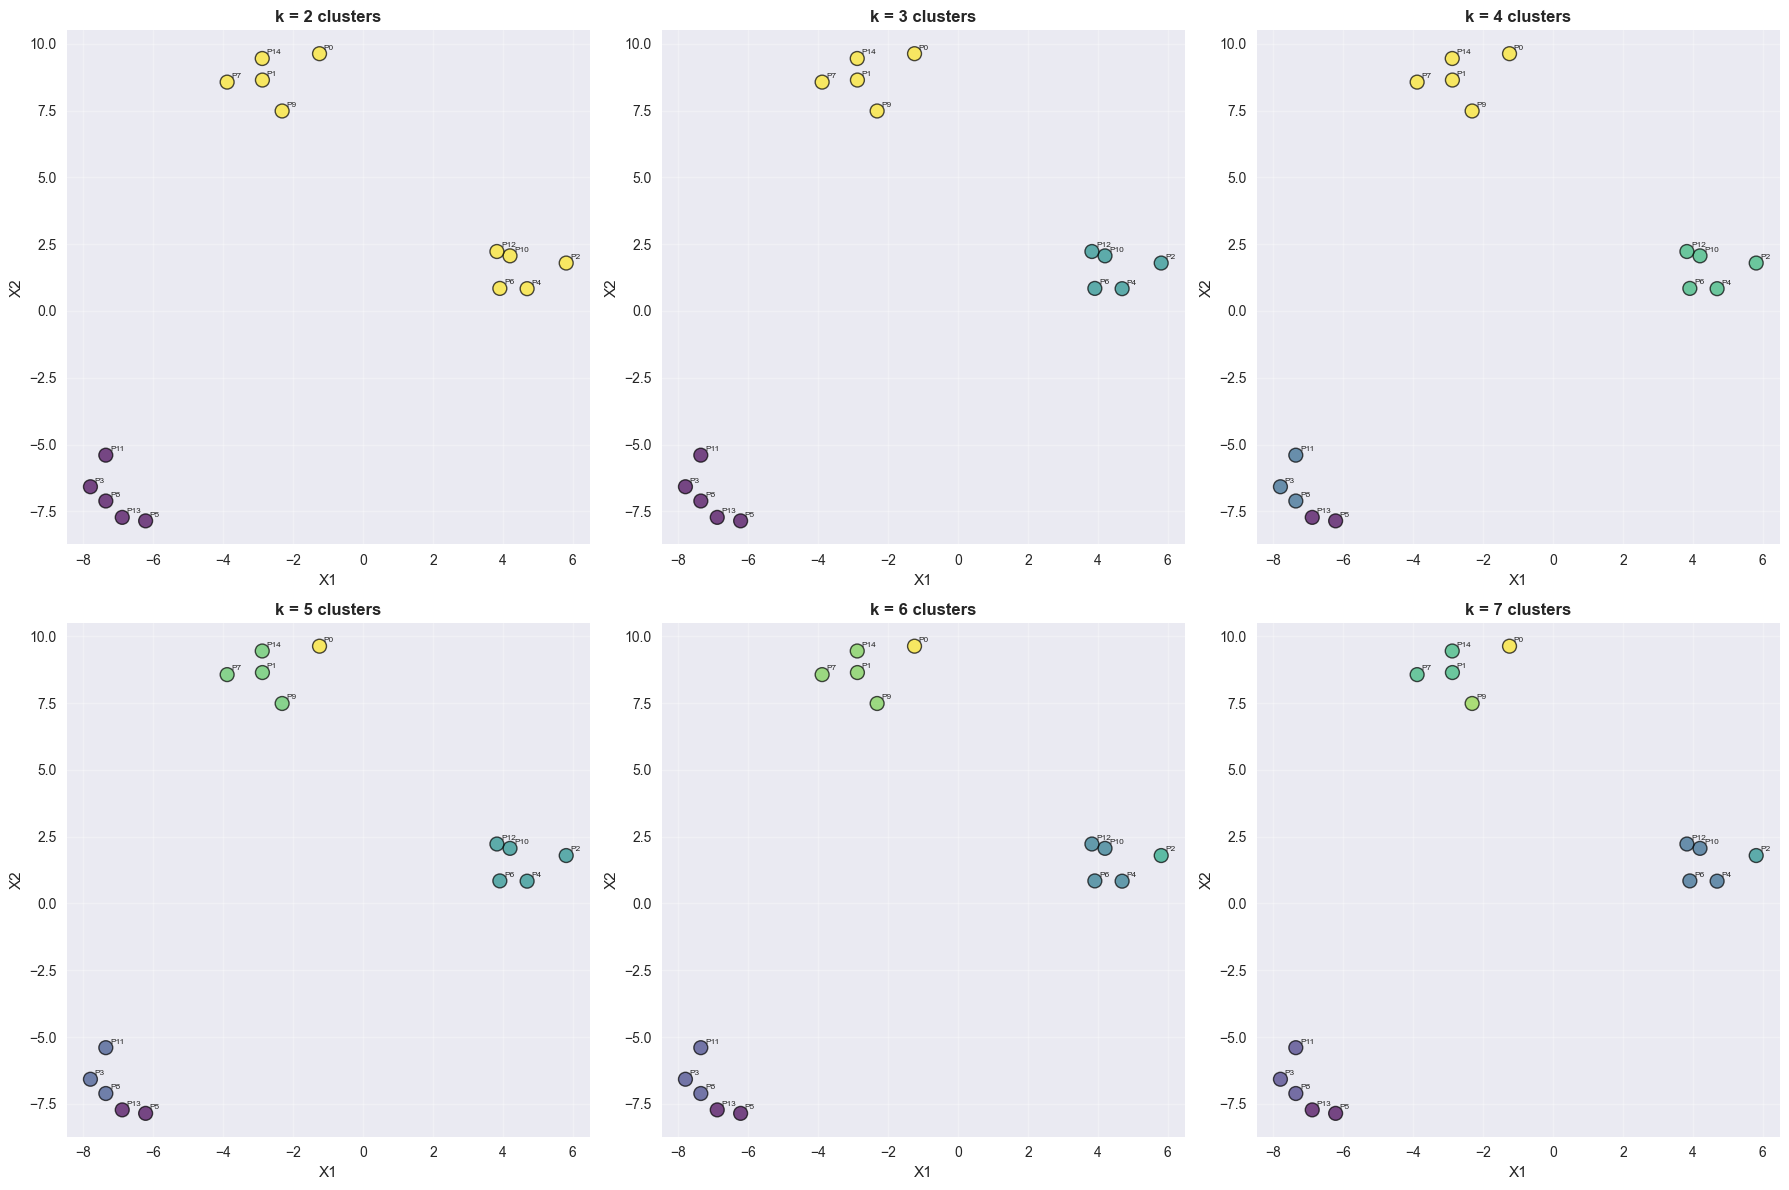

Different cluster cuts visualized!
Notice how the number of clusters affects the grouping


In [ ]:
# Visualize different cluster cuts
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Different numbers of clusters to try
n_clusters_list = [2, 3, 4, 5, 6, 7]

for i, n_clusters in enumerate(n_clusters_list):
    row = i // 3
    col = i % 3
    
    # Get cluster assignments
    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
    
    # Plot
    scatter = axes[row, col].scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', 
                                   s=100, alpha=0.7, edgecolors='black', linewidth=1)
    
    # Add point labels
    for j, (x, y) in enumerate(X):
        axes[row, col].annotate(f'P{j}', (x, y), xytext=(3, 3), 
                               textcoords='offset points', fontsize=6)
    
    axes[row, col].set_title(f'k = {n_clusters} clusters', fontweight='bold')
    axes[row, col].set_xlabel('X1')
    axes[row, col].set_ylabel('X2')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Different cluster cuts visualized!")
print("Notice how the number of clusters affects the grouping")

## Вибір кількості кластерів

### Методи визначення оптимального k

#### 1. Візуальний огляд дендрограми
- Шукати великі вертикальні відстані між гілками
- Точки з великими відстанями вказують на природні розділення
- Суб'єктивний, але часто ефективний

#### 2. Метод ліктя
- Побудувати графік висоти злиття проти кількості кластерів
- Шукати точку "ліктя", де швидкість зміни сповільнюється
- Подібно до методу ліктя в k-means

#### 3. Силуетний аналіз
- Обчислити силуетний бал для різних значень k
- Вибрати k з найвищим силуетним балом
- Об'єктивний метод оцінки якості кластерів

#### 4. Предметні знання
- Використовувати розуміння проблеми
- Враховувати бізнес-вимоги
- Може бути найкращим методом для конкретних застосувань

📊 Elbow Method for Hierarchical Clustering
k = 2: WCSS = 273.40
k = 3: WCSS = 16.50
k = 4: WCSS = 12.97
k = 5: WCSS = 9.57
k = 6: WCSS = 7.31
k = 7: WCSS = 5.23


/var/folders/jq/209h6ksd2wbc03t0j0mxk1bh0000gn/T/ipykernel_51242/1844815999.py:36: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
/Users/roman/.pyenv/versions/3.10.10/envs/data-mining-course/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


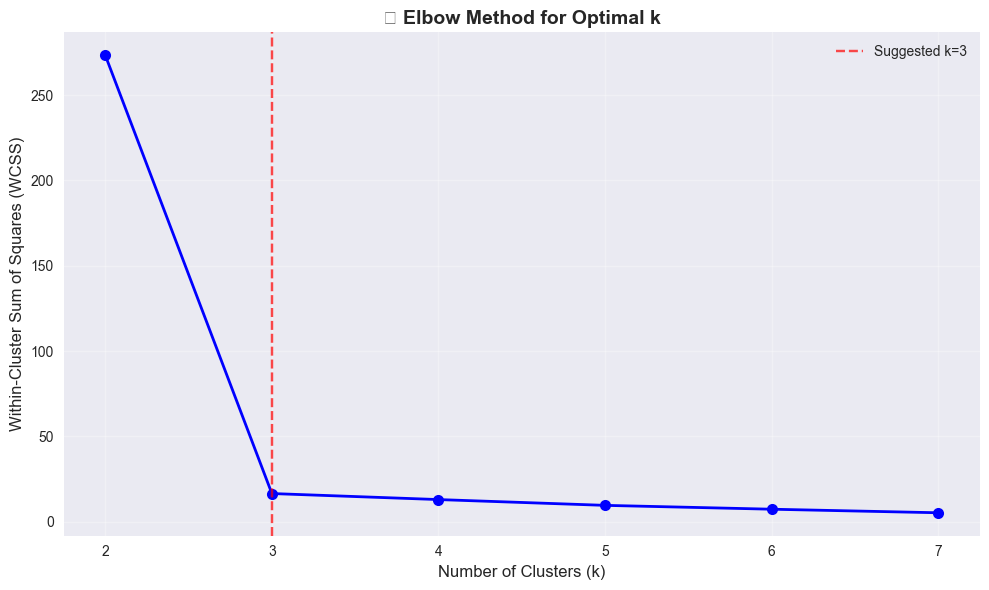


💡 The elbow appears to be at k=3, which matches our true number of clusters!


In [ ]:
# Implement elbow method for hierarchical clustering
print("Elbow Method for Hierarchical Clustering")
print("=" * 50)

# Calculate within-cluster sum of squares for different k values
k_range = range(2, 8)
wcss_values = []

for k in k_range:
    # Get cluster assignments
    clusters = fcluster(linkage_matrix, k, criterion='maxclust')
    
    # Calculate WCSS
    wcss = 0
    for cluster_id in np.unique(clusters):
        cluster_points = X[clusters == cluster_id]
        if len(cluster_points) > 0:
            centroid = np.mean(cluster_points, axis=0)
            wcss += np.sum((cluster_points - centroid) ** 2)
    
    wcss_values.append(wcss)
    print(f"k = {k}: WCSS = {wcss:.2f}")

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss_values, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.title('Elbow Method for Optimal k', fontweight='bold', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(k_range)

# Highlight the "elbow" (k=3 in this case)
plt.axvline(x=3, color='red', linestyle='--', alpha=0.7, label='Suggested k=3')
plt.legend()
plt.tight_layout()
plt.show()

print(f"\nThe elbow appears to be at k=3, which matches our true number of clusters!")

🎭 Silhouette Analysis
k = 2: Silhouette Score = 0.690
k = 3: Silhouette Score = 0.862
k = 4: Silhouette Score = 0.695
k = 5: Silhouette Score = 0.509
k = 6: Silhouette Score = 0.319
k = 7: Silhouette Score = 0.296


/var/folders/jq/209h6ksd2wbc03t0j0mxk1bh0000gn/T/ipykernel_51242/3341745817.py:29: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) Arial.
  plt.tight_layout()
/Users/roman/.pyenv/versions/3.10.10/envs/data-mining-course/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


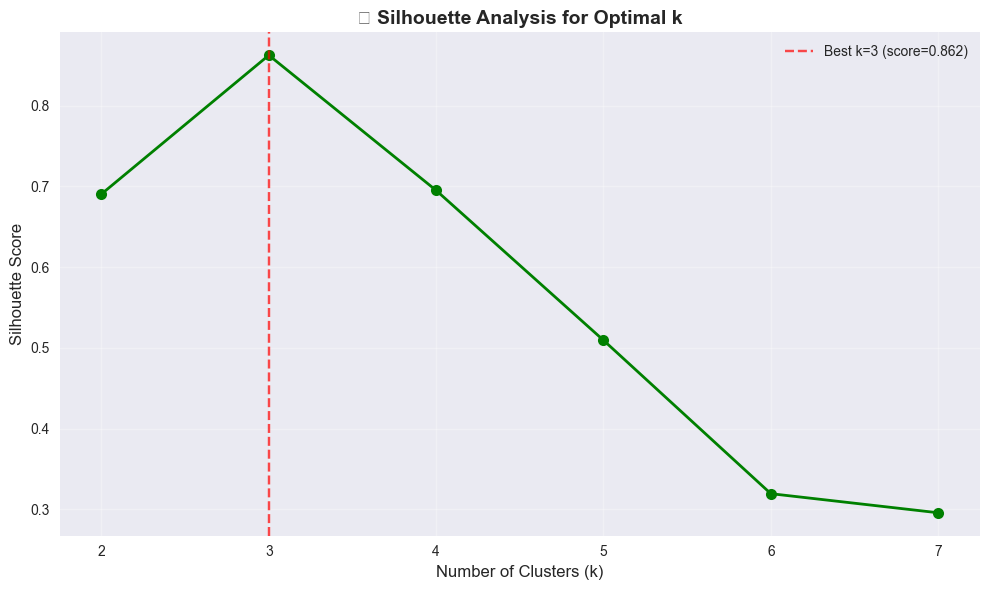


🏆 Best k according to silhouette analysis: 3
Silhouette score: 0.862


In [ ]:
# Silhouette analysis for different k values
from sklearn.metrics import silhouette_score

print("Silhouette Analysis")
print("=" * 30)

silhouette_scores = []

for k in k_range:
    clusters = fcluster(linkage_matrix, k, criterion='maxclust')
    silhouette_avg = silhouette_score(X, clusters)
    silhouette_scores.append(silhouette_avg)
    print(f"k = {k}: Silhouette Score = {silhouette_avg:.3f}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Analysis for Optimal k', fontweight='bold', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(k_range)

# Highlight the best k
best_k = k_range[np.argmax(silhouette_scores)]
plt.axvline(x=best_k, color='red', linestyle='--', alpha=0.7, 
           label=f'Best k={best_k} (score={max(silhouette_scores):.3f})')
plt.legend()
plt.tight_layout()
plt.show()

print(f"\nBest k according to silhouette analysis: {best_k}")
print(f"Silhouette score: {max(silhouette_scores):.3f}")

Final Comprehensive Visualization


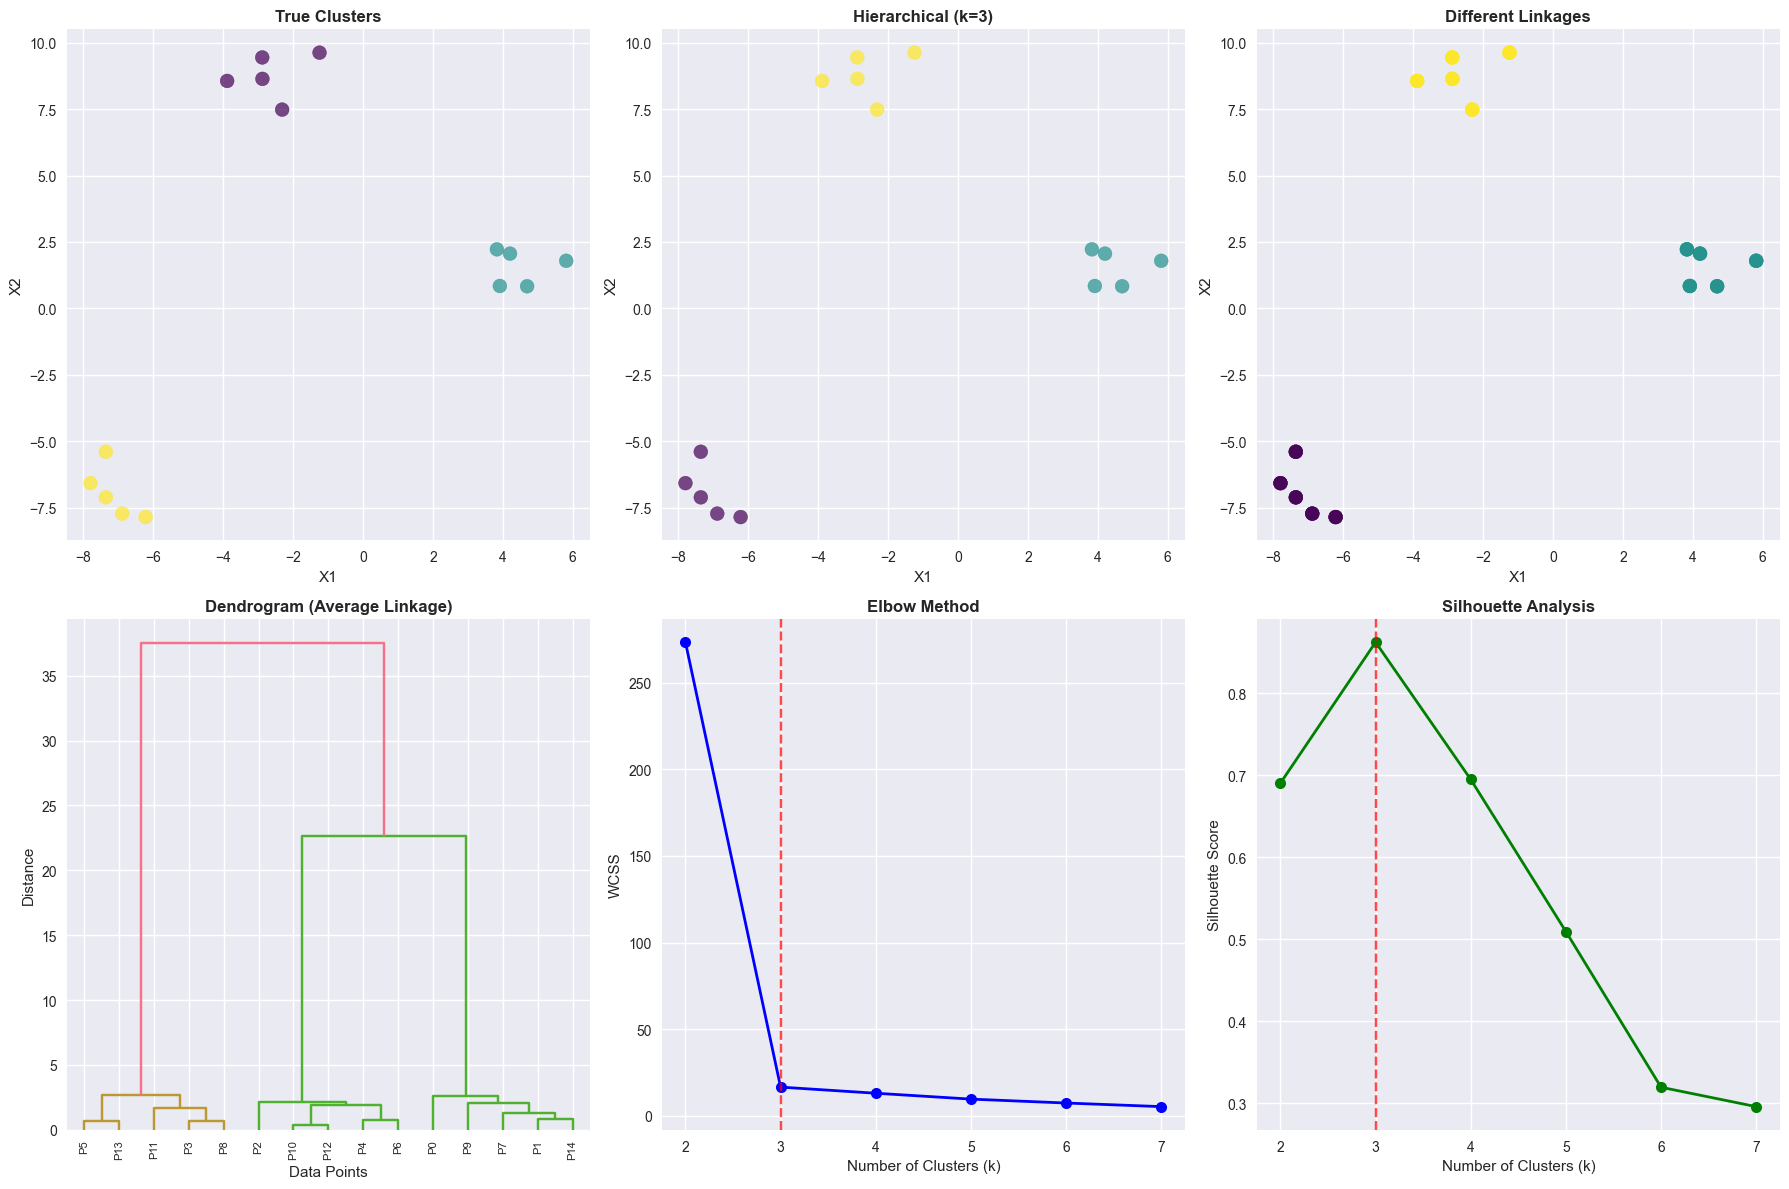

Hierarchical clustering analysis complete!
You now understand how to use hierarchical clustering effectively! 🚀


In [ ]:
# Final comprehensive visualization
print("Final Comprehensive Visualization")
print("=" * 40)

# Create a comprehensive comparison plot
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Original data with true clusters
axes[0, 0].scatter(X[:, 0], X[:, 1], c=true_labels, cmap='viridis', s=100, alpha=0.7)
axes[0, 0].set_title('True Clusters', fontweight='bold')
axes[0, 0].set_xlabel('X1')
axes[0, 0].set_ylabel('X2')

# 2. Hierarchical clustering (k=3)
hierarchical_clusters = fcluster(linkage_matrix, 3, criterion='maxclust')
axes[0, 1].scatter(X[:, 0], X[:, 1], c=hierarchical_clusters, cmap='viridis', s=100, alpha=0.7)
axes[0, 1].set_title('Hierarchical (k=3)', fontweight='bold')
axes[0, 1].set_xlabel('X1')
axes[0, 1].set_ylabel('X2')

# 3. Different linkage methods comparison
linkage_methods = ['single', 'complete', 'average']
for i, method in enumerate(linkage_methods):
    linkage_mat = linkage(X, method=method)
    clusters = fcluster(linkage_mat, 3, criterion='maxclust')
    axes[0, 2].scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=100, alpha=0.7)
    axes[0, 2].set_title('Different Linkages', fontweight='bold')
    axes[0, 2].set_xlabel('X1')
    axes[0, 2].set_ylabel('X2')

# 4. Dendrogram
dendrogram(linkage_matrix, ax=axes[1, 0], labels=[f'P{i}' for i in range(len(X))],
          leaf_rotation=90, leaf_font_size=8)
axes[1, 0].set_title('Dendrogram (Average Linkage)', fontweight='bold')
axes[1, 0].set_xlabel('Data Points')
axes[1, 0].set_ylabel('Distance')

# 5. Elbow curve
axes[1, 1].plot(k_range, wcss_values, 'bo-', linewidth=2, markersize=8)
axes[1, 1].set_title('Elbow Method', fontweight='bold')
axes[1, 1].set_xlabel('Number of Clusters (k)')
axes[1, 1].set_ylabel('WCSS')
axes[1, 1].axvline(x=3, color='red', linestyle='--', alpha=0.7)

# 6. Silhouette scores
axes[1, 2].plot(k_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[1, 2].set_title('Silhouette Analysis', fontweight='bold')
axes[1, 2].set_xlabel('Number of Clusters (k)')
axes[1, 2].set_ylabel('Silhouette Score')
axes[1, 2].axvline(x=best_k, color='red', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("Hierarchical clustering analysis complete!")
print("You now understand how to use hierarchical clustering effectively!")